In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #For supervised learning we divide data into train data and test data
                                     #using train_test_split from sklearn to split the data into train and test data
from sklearn.linear_model import LinearRegression  #Implement Linear Regression

In [54]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/auto-mpg.csv")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [56]:
#1 CONVERT the object_dattatype to int/float data type to find the mean/median.
#REPLCAE '?' to null values
df['horsepower']=df['horsepower'].replace("?",np.nan)

In [57]:
#Convert horsepower column  to float type (bcoz to calculate mean/median we need numrical datatype)
df['horsepower']=df['horsepower'].astype(float)

In [58]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [59]:
df.isnull().sum() 
#no missing values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [60]:
median1=df["horsepower"].median()
median1

93.5

In [61]:
df["horsepower"].replace(np.nan,median1,inplace=True)

In [62]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
380,36.0,4,120.0,88.0,2160,14.5,82,3,nissan stanza xe
21,24.0,4,107.0,90.0,2430,14.5,70,2,audi 100 ls
113,21.0,6,155.0,107.0,2472,14.0,73,1,mercury capri v6
148,26.0,4,116.0,75.0,2246,14.0,74,2,fiat 124 tc
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
104,12.0,8,400.0,167.0,4906,12.5,73,1,ford country
120,19.0,4,121.0,112.0,2868,15.5,73,2,volvo 144ea
190,14.5,8,351.0,152.0,4215,12.8,76,1,ford gran torino
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
167,29.0,4,97.0,75.0,2171,16.0,75,3,toyota corolla


In [63]:
df.shape

(398, 9)

Problem statement: To build relationship b/w mpg(miles per gallum) with other attributes.

Note that all the car names are different.

so it not required to have car name.Then drop it.

In [64]:
df.drop("car name",axis=1,inplace=True)

Note that we have a column name Origin(the place name).

After talking to data collection team, we got to know the country origin for the cars


In [65]:
#Replacing the categorical var with actual values
df["origin"]=df['origin'].replace({1:'America',2:'Europe',3:'asia'})
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
177,23.0,4,115.0,95.0,2694,15.0,75,Europe
163,18.0,6,225.0,95.0,3785,19.0,75,America
143,26.0,4,97.0,78.0,2300,14.5,74,Europe
347,37.0,4,85.0,65.0,1975,19.4,81,asia
234,24.5,4,151.0,88.0,2740,16.0,77,America
360,30.7,6,145.0,76.0,3160,19.6,81,Europe
132,25.0,4,140.0,75.0,2542,17.0,74,America
190,14.5,8,351.0,152.0,4215,12.8,76,America
199,20.0,6,225.0,100.0,3651,17.7,76,America
9,15.0,8,390.0,190.0,3850,8.5,70,America


Note that origin column, the numbers got replaced with the names(it's like reverse of ENCODING)

Since now we have the categorical data, we do ENCODING.

In [66]:
### ONE HOT ENCODING
df=pd.get_dummies(df,columns=['origin'])
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_asia
89,15.0,8,318.0,150.0,3777,12.5,73,1,0,0
177,23.0,4,115.0,95.0,2694,15.0,75,0,1,0
198,33.0,4,91.0,53.0,1795,17.4,76,0,0,1
333,32.7,6,168.0,132.0,2910,11.4,80,0,0,1
191,22.0,6,225.0,100.0,3233,15.4,76,1,0,0
369,34.0,4,112.0,88.0,2395,18.0,82,1,0,0
65,14.0,8,351.0,153.0,4129,13.0,72,1,0,0
336,23.6,4,140.0,93.5,2905,14.3,80,1,0,0
15,22.0,6,198.0,95.0,2833,15.5,70,1,0,0
289,16.9,8,350.0,155.0,4360,14.9,79,1,0,0


In [67]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Europe       uint8
origin_asia         uint8
dtype: object

all the attributes are now of numerical data type

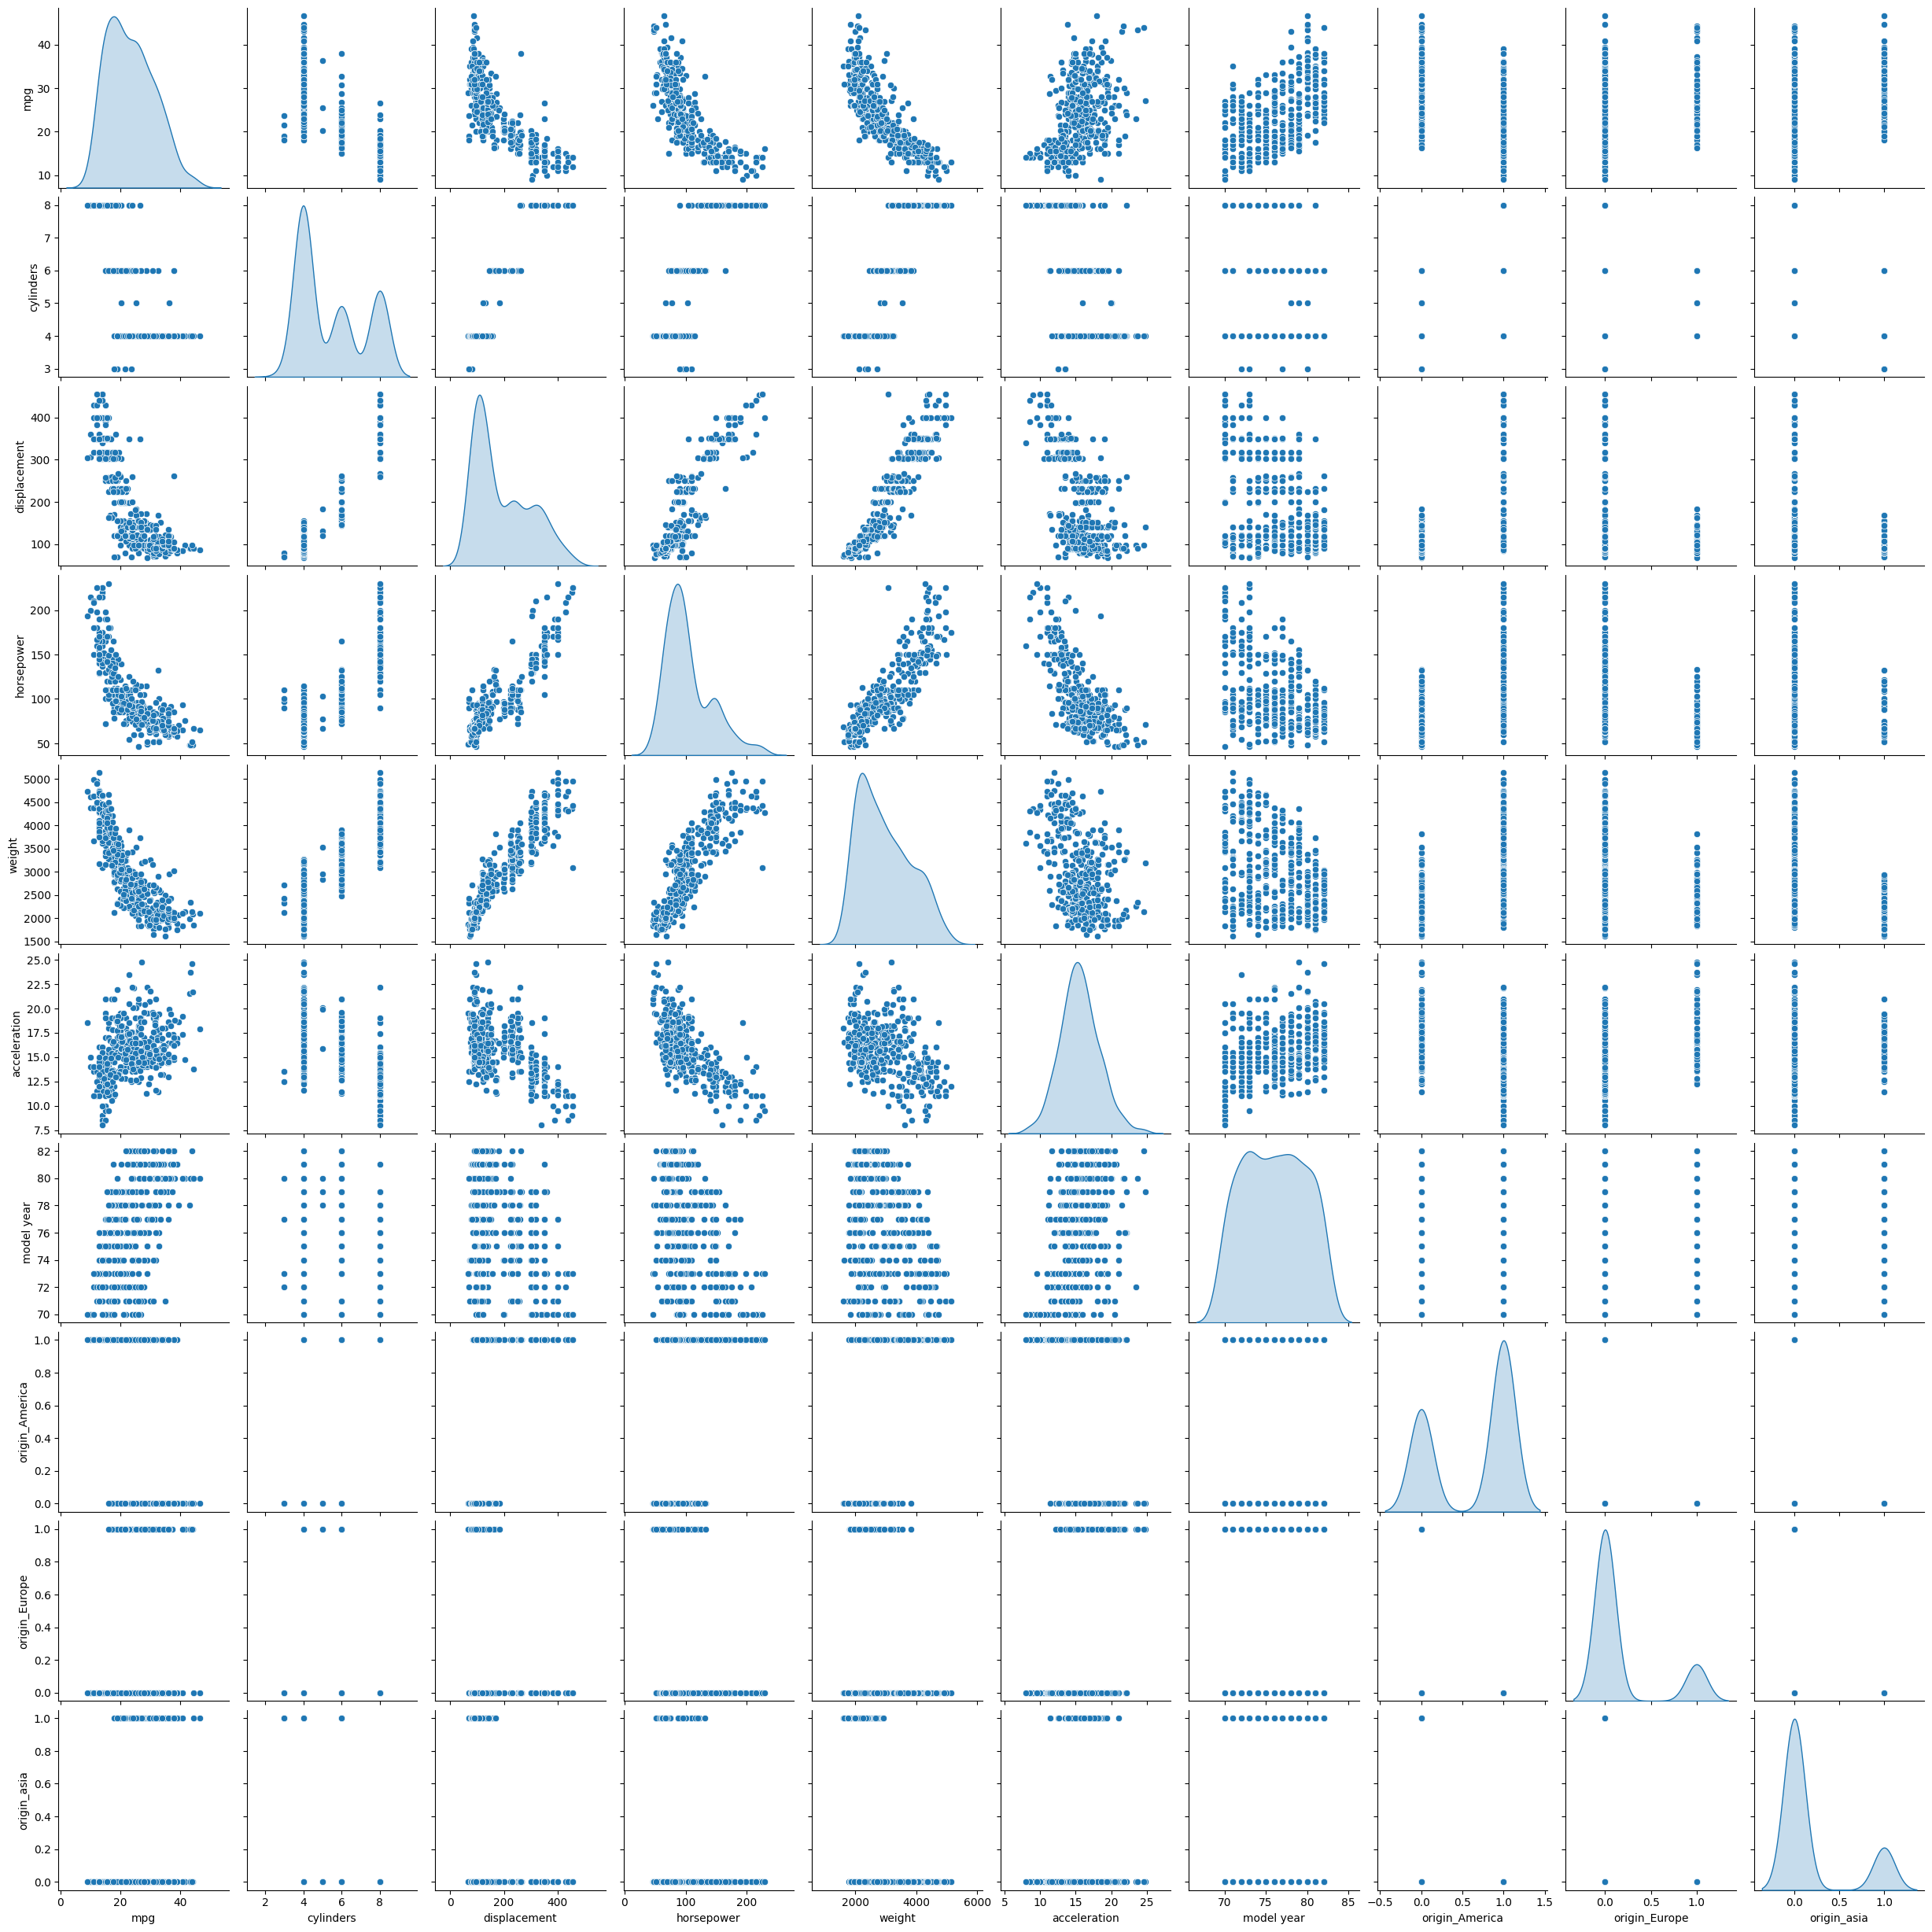

In [68]:
#pairplot
sns.pairplot(df,diag_kind="kde")

SPLIT DATA

In [69]:
#Build our Linear model in which D.V is mpg and all other attributes except mpg are Independent Variable
# independent Variables X 
X=df.drop(["mpg"],axis=1)

#Dependent Variable Y
y=df[["mpg"]]


In [70]:
#SPLIT X & y into training and test set in 70:30 ratio

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)
#random_state is not necessary to use; it just fixes the score.
#bcoz the model score will alway come a bit different everytime we run.

FIT LINEAR MODEL

In [71]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

The Score R^2 for in-sample(Training):-

In [72]:
model_1.score(X_train,y_train)

0.814102550161056

The Score R^2 for out-sample(Testing):-

In [73]:
model_1.score(X_test,y_test)

0.8433135132808828